<a href="https://colab.research.google.com/github/lfhenaol/CRP_Taller_4/blob/master/Taller_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)


Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import pandas as pd
import numpy as np

os.chdir("/content/drive/My Drive/U/Posgrado 2019-2/CRP")
!ls


 DatosNegativos3.csv
 DatosPositivos3.csv
 DatosValidacion3.csv
 FeatureExtraction_Lab-1_solved.ipynb
 LearningML.ipynb
'Poster CRP'
 SelectingFeatures.ipynb
'Taller1-PreprocesamientoDeImagenes (4).ipynb'
 Taller_4.ipynb


In [0]:
positive_data = pd.read_csv('DatosPositivos3.csv')

In [0]:
positive_data.head()

,Unnamed: 0,sequence,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,hydrophobic_ratio,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,AA,AR,AN,AD,AC,AE,AQ,...,embed_2_61,embed_2_62,embed_2_63,embed_2_64,embed_2_65,embed_2_66,embed_2_67,embed_2_68,embed_2_69,embed_2_70,embed_2_71,embed_2_72,embed_2_73,embed_2_74,embed_2_75,embed_2_76,embed_2_77,embed_2_78,embed_2_79,embed_2_80,embed_2_81,embed_2_82,embed_2_83,embed_2_84,embed_2_85,embed_2_86,embed_2_87,embed_2_88,embed_2_89,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99,class
0,0,CGGYSGGWKRKRSTSYRCG,19,2109.36,4.859,0.002304,10.056702,-1.310526,73.031579,0.157895,0.000000,3.122105,0.105263,0.000,15.789,0.0,0.0,10.526,0.0,0.0,26.316,0.00,0.00,0.000,10.526,0.000,0.000,0.000,15.789,5.263,5.263,10.526,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.075590,0.296535,-0.677439,-0.851556,0.332322,0.307534,-0.934734,0.639869,0.268721,0.754809,-0.110266,-0.196712,-0.045030,0.896194,-0.515224,-0.186160,0.702498,0.222887,-0.431514,0.004193,0.106806,0.199192,0.421206,-0.720576,0.439543,-0.814577,0.542674,0.327480,0.451599,-0.374047,0.921890,0.086883,-0.264126,0.593641,0.272707,-1.412352,-0.050157,-0.657932,0.072015,1
1,1,GIMISLMKKLAAHIAK,16,1725.22,3.094,0.001793,10.302063,0.887500,20.918750,0.000000,140.625000,-0.685000,0.625000,18.750,0.000,0.0,0.0,0.000,0.0,0.0,6.250,6.25,18.75,12.500,18.750,12.500,0.000,0.000,6.250,0.000,0.000,0.000,0.0,6.67,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.209348,0.021843,-1.087510,-0.781188,0.408900,0.079849,-0.501484,0.385953,0.421871,0.279649,-0.165011,-0.063239,-0.146871,0.268725,-0.071581,-0.152268,0.644949,-0.384647,-0.419641,-0.190870,-0.035953,0.883951,0.111531,-0.669440,0.241797,-0.413818,0.688888,0.539756,0.168385,-0.168786,0.612335,-0.424749,-0.604363,-0.107965,-0.103306,-1.036699,-0.512895,-0.274436,-0.125522,1
2,2,FKAWRWAWRMKKLAAPS,17,2133.57,4.995,0.002341,12.024475,-0.594118,43.088235,0.235294,46.470588,1.494706,0.411765,23.529,11.765,0.0,0.0,0.000,0.0,0.0,0.000,0.00,0.00,5.882,17.647,5.882,5.882,5.882,5.882,0.000,17.647,0.000,0.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.434286,-0.543370,-0.563254,-0.481423,0.699644,0.227808,-0.680200,0.371845,-0.182639,0.318903,-0.400308,0.237055,-0.589457,0.555851,0.129094,-0.425677,0.913427,-0.469834,-0.918976,-0.785608,0.435777,0.636395,0.784406,-0.661122,0.697260,-1.021734,1.050570,0.505323,-0.519617,-0.121807,1.164646,0.292256,-0.114444,1.073405,0.884583,-2.475456,-0.661676,-0.497003,0.223890,1
3,3,WGWRDIVAGIRKVAAPVLST,20,2195.57,1.996,0.000909,10.835022,0.435000,17.010000,0.100000,117.000000,0.561500,0.450000,15.000,10.000,0.0,5.0,0.000,0.0,0.0,10.000,0.00,10.00,5.000,5.000,0.000,0.000,5.000,5.000,5.000,10.000,0.000,15.0,5.26,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.157962,0.379280,-0.757595,-1.078672,0.756867,0.379479,-0.928272,0.611120,-0.149692,0.719999,-0.534426,0.084668,0.201529,0.037534,-0.362736,-0.173763,0.229293,-0.199606,-0.909858,-0.149773,0.174392,-0.015831,0.573899,-1.010178,0.787714,-1.113688,0.867610,0.428287,0.082314,-0.591859,1.735344,-0.013287,-0.684307,0.938154,0.553792,-1.643541,-0.550338,-0.524435,0.252785,1
4,4,DTHFPICIFCCGCCRQSNCGMCCKT,25,2774.34,0.555,0.000200,7.713074,0.392000,31.272000,0.080000,31.200000,0.972000,0.520000,0.000,4.000,4.0,4.0,32.000,0.0,4.0,8.000,4.00,8.00,0.000,4.000,4.000,8.000,4.000,4.000,8.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.613098,0.752622,-0.769190,-0.489062,0.503171,0.650787,-0.523382,0.019970,-0.012003,1.158296,-0.594083,-0.378756,0.093352,0.447195,0.175899,0.386873,1.395994,0.004446,-0.412632,-0.357491,-0.312645,0.446376,0.040463,-0.474146,0.948174,-0.620298,0.664511,0.795336,-0.057320,-1.303950,1.459582,-0.946822,0.029422,0.634483,1.211366,-2.779123,-0.945796,-1.264345,-0.040525,1


In [0]:
positive_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8322 entries, 0 to 8321
Data columns (total 1761 columns):
Unnamed: 0                          8322 non-null int64
sequence                            8322 non-null object
length                              8322 non-null int64
molecular_weight                    8322 non-null float64
charge                              8322 non-null float64
charge_density                      8322 non-null float64
isoelectric_point                   8322 non-null float64
gravy                               8322 non-null float64
instability_index                   8322 non-null float64
aromaticity                         8322 non-null float64
aliphatic_index                     8322 non-null float64
boman_index                         8322 non-null float64
hydrophobic_ratio                   8322 non-null float64
A                                   8322 non-null float64
R                                   8322 non-null float64
N                         

Se evidencia que el datase de datos positivos no presenta valores nulos


In [0]:
negative_data = pd.read_csv('DatosNegativos3.csv')

In [0]:
negative_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7133 entries, 0 to 7132
Data columns (total 1760 columns):
sequence                            7133 non-null object
length                              7133 non-null int64
molecular_weight                    7133 non-null float64
charge                              7133 non-null float64
charge_density                      7133 non-null float64
isoelectric_point                   7133 non-null float64
gravy                               7133 non-null float64
instability_index                   7133 non-null float64
aromaticity                         7133 non-null float64
aliphatic_index                     7133 non-null float64
boman_index                         7133 non-null float64
hydrophobic_ratio                   7133 non-null float64
A                                   7133 non-null float64
R                                   7133 non-null float64
N                                   7133 non-null float64
D                       

In [0]:
negative_data.columns

Index(['sequence', 'length', 'molecular_weight', 'charge', 'charge_density',
       'isoelectric_point', 'gravy', 'instability_index', 'aromaticity',
       'aliphatic_index',
       ...
       'embed_2_91', 'embed_2_92', 'embed_2_93', 'embed_2_94', 'embed_2_95',
       'embed_2_96', 'embed_2_97', 'embed_2_98', 'embed_2_99', 'class'],
      dtype='object', length=1760)

In [0]:
positive_data.columns

Index(['Unnamed: 0', 'sequence', 'length', 'molecular_weight', 'charge',
       'charge_density', 'isoelectric_point', 'gravy', 'instability_index',
       'aromaticity',
       ...
       'embed_2_91', 'embed_2_92', 'embed_2_93', 'embed_2_94', 'embed_2_95',
       'embed_2_96', 'embed_2_97', 'embed_2_98', 'embed_2_99', 'class'],
      dtype='object', length=1761)

In [0]:
different_columns = [i for i in positive_data.columns if not(i in negative_data)]

In [0]:
positive_data = positive_data.drop(columns=different_columns)

In [0]:
data = pd.concat([negative_data, positive_data], ignore_index=True)

In [0]:
data

,sequence,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,hydrophobic_ratio,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,AA,AR,AN,AD,AC,AE,AQ,AG,...,embed_2_61,embed_2_62,embed_2_63,embed_2_64,embed_2_65,embed_2_66,embed_2_67,embed_2_68,embed_2_69,embed_2_70,embed_2_71,embed_2_72,embed_2_73,embed_2_74,embed_2_75,embed_2_76,embed_2_77,embed_2_78,embed_2_79,embed_2_80,embed_2_81,embed_2_82,embed_2_83,embed_2_84,embed_2_85,embed_2_86,embed_2_87,embed_2_88,embed_2_89,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99,class
0,MHSVIFRFFFYFST,14,1829.13,1.094,0.000598,8.518738,0.950000,73.486429,0.428571,48.571429,0.205714,0.571429,0.000,7.143,0.000,0.000,0.000,0.0,0.000,0.000,7.143,7.143,0.000,0.000,7.143,35.714,0.000,14.286,7.143,0.000,7.143,7.143,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,-0.044783,-0.135796,-0.279954,-0.508689,0.552800,0.343174,-0.284248,0.305985,0.632925,0.307695,-0.200332,-0.500616,0.417093,0.333355,-0.033228,0.000744,0.377036,0.041152,-0.326289,0.129854,-0.198599,0.348159,0.384603,-0.364909,0.515573,-0.271251,0.081181,0.459116,0.137660,-0.493198,0.834055,0.128026,-0.691695,0.368040,-0.047784,-1.015235,-0.416884,-0.560551,0.153635,0
1,MTHGLRHMPTQQIA,14,1620.90,1.193,0.000736,9.538269,-0.528571,67.092857,0.000000,62.857143,1.655000,0.357143,7.143,7.143,0.000,0.000,0.000,0.0,14.286,7.143,14.286,7.143,7.143,0.000,14.286,0.000,7.143,0.000,14.286,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,-0.238870,0.613590,-0.318031,-0.883980,0.191241,0.296133,-0.257091,0.771860,-0.020144,0.020857,-0.324203,-0.016293,-0.265824,0.173007,-0.626136,-0.008627,0.358015,-0.083035,-0.600014,-0.422134,-0.253059,0.730255,0.071091,-0.625902,0.651653,-0.743421,0.592430,0.445150,-0.035435,-0.046818,1.002828,-0.251941,-0.302573,0.204947,0.358579,-1.489173,-0.506322,-0.241189,-0.312264,0
2,MPKASQSRGFFLRA,14,1595.87,2.996,0.001877,12.008484,-0.364286,107.264286,0.142857,42.142857,2.138571,0.428571,14.286,14.286,0.000,0.000,0.000,0.0,7.143,7.143,0.000,0.000,7.143,7.143,7.143,14.286,7.143,14.286,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,-0.087267,0.017075,-0.550396,-0.495024,0.681193,0.695331,-0.398602,0.402369,-0.028586,0.348126,-0.302806,-0.091549,0.177044,0.488309,-0.336581,-0.236963,0.673696,-0.229122,-0.534636,-0.288816,0.059683,0.260225,0.546405,-0.237444,0.451307,-0.829680,0.347168,0.293680,0.340563,-0.453487,0.812079,-0.038203,-0.198857,0.557722,0.393847,-1.352105,-0.402659,-0.425357,-0.448073,0
3,MICGPCRTPFLYHG,14,1594.93,0.959,0.000601,7.846252,0.307143,19.064286,0.142857,55.714286,0.191429,0.428571,0.000,7.143,0.000,0.000,14.286,0.0,0.000,14.286,7.143,7.143,7.143,0.000,7.143,7.143,14.286,0.000,7.143,0.000,7.143,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,-0.067798,0.318655,-0.599492,0.007523,0.014623,0.580805,-0.036934,0.237900,-0.051769,0.879467,-0.324264,0.114492,-0.145100,0.075777,-0.331819,0.628224,1.025415,-0.496425,-0.442544,-0.185787,-0.382300,0.176774,0.416058,-0.161296,0.273547,-0.235735,1.034341,0.663225,-0.473517,-0.491516,0.725756,-0.237831,-0.521340,0.266024,0.214896,-1.549035,-0.264779,-0.622463,0.387449,0
4,MTHSMKLRFPTLAQ,14,1661.01,2.094,0.001261,11.000305,-0.207143,28.678571,0.071429,62.857143,1.420000,0.428571,7.143,7.143,0.000,0.000,0.000,0.0,7.143,0.000,7.143,0.000,14.286,7.143,14.286,7.143,7.143,7.143,14.286,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,7.69,0.00,...,-0.082713,0.459932,-0.270898,-0.402704,0.406305,0.240549,-0.199059,0.912435,0.055101,0.418447,-0.144253,-0.011198,0.060172,0.246767,-0.125149,0.187712,0.273073,-0.168742,-0.638734,-0.735674,0.079978,0.327904,0.676977,-0.786198,0.513305,-0.433983,0.579489,0.483694,-0.004150,-0.548767,1.080040,-0.472935,-0.591539,0.157634,-0.217100,-1.459367,-0.424053,-0.233996,-0.005371,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [0]:
[i for i in data.columns if (True in data[i].isnull().unique()) or (True in data[i].isna().unique())]

[]

El dataset no presenta columnas con valores nulos

In [0]:
negative_data['class'].unique()

array([0])

In [0]:
data.describe()

,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,hydrophobic_ratio,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,AA,AR,AN,AD,AC,AE,AQ,AG,AH,...,embed_2_61,embed_2_62,embed_2_63,embed_2_64,embed_2_65,embed_2_66,embed_2_67,embed_2_68,embed_2_69,embed_2_70,embed_2_71,embed_2_72,embed_2_73,embed_2_74,embed_2_75,embed_2_76,embed_2_77,embed_2_78,embed_2_79,embed_2_80,embed_2_81,embed_2_82,embed_2_83,embed_2_84,embed_2_85,embed_2_86,embed_2_87,embed_2_88,embed_2_89,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99,class
count,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,...,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000,15455.000000
mean,18.804465,2160.578808,1.945088,0.000929,8.573247,-0.109622,39.624764,0.110763,88.800376,1.345674,0.415551,7.062693,7.919146,3.323442,2.871109,3.399596,2.975770,2.721689,6.663124,2.497826,5.975376,10.631683,9.320132,3.431108,5.202820,4.397952,5.554093,4.327116,3.203738,2.669740,5.851770,0.779013,0.400927,0.186732,0.206907,0.165057,0.214791,0.161438,0.548136,0.164188,...,-0.337367,0.214685,-0.634268,-0.628937,0.579997,0.420131,-0.614751,0.538491,0.248137,0.581966,-0.376253,-0.127641,0.152718,0.406576,-0.372591,0.011397,0.685447,-0.036312,-0.586674,-0.228340,0.026422,0.453757,0.463704,-0.648480,0.538189,-0.987970,0.592100,0.468705,0.173535,-0.513660,1.150113,-0.215161,-0.538054,0.414534,0.319167,-1.499448,-0.518411,-0.384880,0.112000,0.538467
std,7.103166,785.784582,2.927491,0.001371,2.625690,0.941377,42.644308,0.099277,47.325213,1.755765,0.146618,8.119507,10.033385,4.781342,4.853938,6.543614,4.951777,4.567507,7.177739,5.324904,6.656996,9.880631,10.820454,4.322214,6.577384,6.474645,6.359570,5.582034,7.242789,4.390398,6.549871,2.630943,1.768694,1.088392,1.200473,1.096361,1.170776,1.019571,1.897454,1.101715,...,0.304485,0.290697,0.417345,0.366946,0.356829,0.311013,0.437075,0.364230,0.357732,0.395674,0.287631,0.331493,0.285666,0.285417,0.327010,0.244390,0.407259,0.251179,0.337266,0.281325,0.299836,0.370036,0.357198,0.379769,0.340127,0.527981,0.381070,0.307808,0.243507,0.345307,0.594697,0.292025,0.355752,0.306055,0.287533,0.773312,0.339080,0.311701,0.246109,0.498534
min,6.000000,524.530000,-13.894000,-0.007838,3.124573,-4.380000,-71.779167,0.000000,0.000000,-3.992500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.844499,-1.149225,-3.259001,-2.848602,-0.817775,-1.189029,-3.442266,-0.913115,-1.251712,-0.986497,-2.021952,-1.827848,-2.698096,-0.738084,-2.137657,-1.299054,-0.750126,-2.612453,-2.002170,-1.995716,-2.999675,-1.089128,-1.155274,-2.273174,-0.657895,-3.267175,-0.654909,-0.625739,-1.188550,-3.257085,-0.164153,-1.990376,-2.326579,-1.324751,-0.571215,-4.883934,-2.209890,-1.964081,-1.434467,0.000000
25%,13.000000,1551.855000,-0.003

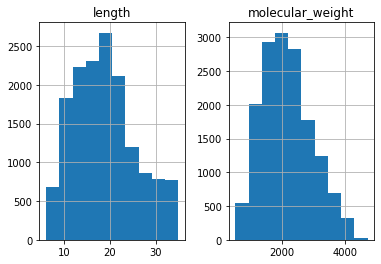

In [0]:
import matplotlib.pyplot as plt

pd.DataFrame([data['length'],data['molecular_weight']]).transpose().hist()
plt.show()

Se aplica división de los datos, datos para entrenamiento y datos para pruebas

In [0]:
# Código tomado del libro de Hands on machine learning
'''def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.2)
'''

'def split_train_test(data, test_ratio):\n  shuffled_indices = np.random.permutation(len(data))\n  test_set_size = int(len(data) * test_ratio)\n  test_indices = shuffled_indices[:test_set_size]\n  train_indices = shuffled_indices[test_set_size:]\n  return data.iloc[train_indices], data.iloc[test_indices]\n\ntrain_set, test_set = split_train_test(data, 0.2)\n'

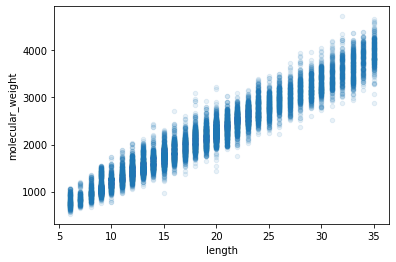

In [0]:
data.plot(kind="scatter", x="length", y="molecular_weight", alpha=0.1)

In [0]:
matrix_corr = data.corr()
matrix_corr['molecular_weight'].sort_values(ascending=False)

molecular_weight    1.000000
length              0.971649
taugrant13          0.903022
tausw13             0.903022
taugrant11          0.900835
                      ...   
embed_2_24         -0.867462
embed_2_29         -0.870439
embed_0_40         -0.915347
embed_1_40         -0.920966
embed_2_40         -0.926435
Name: molecular_weight, Length: 1759, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb67d9169b0>,
      dtype=object)

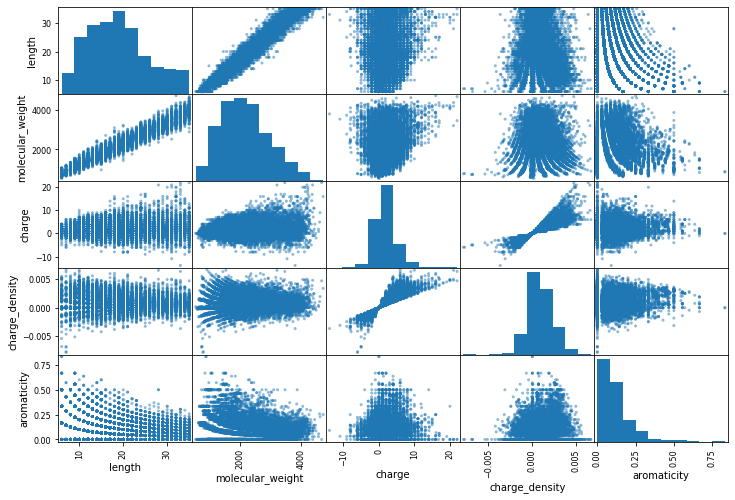

In [0]:
from pandas.plotting import scatter_matrix

attributes = ["length", "molecular_weight", "charge", "charge_density", "aromaticity"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [0]:
# La mayoría de métodos solo funciona con datos númericos
# dtypes: float64(1757), int64(2)
data_num = data.drop("sequence", axis=1)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15455 entries, 0 to 15454
Columns: 1759 entries, length to class
dtypes: float64(1757), int64(2)
memory usage: 207.4 MB


In [0]:
#train_set.info()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

#https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36
"""
We spent quite a bit of time on test set generation for a good reason: 
this is an often neglected but critical part of a Machine Learning project. 
Moreover, many of these ideas will be useful later when we discuss cross-validation. 
"""
data_labels = data["class"]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_num, data_labels):
  X_strat_train_set, X_strat_test_set = data_num.loc[train_index], data_num.loc[test_index]
  y_strat_train_set, y_strat_test_set = data_labels[train_index], data_labels[test_index]


In [0]:
y_strat_train_set.value_counts()

1    6658
0    5706
Name: class, dtype: int64

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('std_scaler', StandardScaler())
])
X_train_data_prepared = num_pipeline.fit_transform(X_strat_train_set)
X_test_data_prepared = num_pipeline.transform(X_strat_test_set)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'max_iter': [1000, 1500, 2000], 'tol': [1e-2, 1e-3, 1e-4], 'alpha': [1e-2, 1e-3, 1e-4, 1e-5], 'random_state': [42]},
]


In [0]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
model = grid_search.fit(X_train_data_prepared, y_strat_train_set)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)
#model = sgd_clf.fit(X_train_data_prepared, y_strat_train_set)
#predict = sgd_clf.predict(X_test_data_prepared)

0.16460157867391814 {'alpha': 0.01, 'max_iter': 1000, 'random_state': 42, 'tol': 0.01}
0.15235425936224753 {'alpha': 0.01, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001}
0.13063325320326458 {'alpha': 0.01, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001}
0.16460157867391814 {'alpha': 0.01, 'max_iter': 1500, 'random_state': 42, 'tol': 0.01}
0.15235425936224753 {'alpha': 0.01, 'max_iter': 1500, 'random_state': 42, 'tol': 0.001}
0.13063325320326458 {'alpha': 0.01, 'max_iter': 1500, 'random_state': 42, 'tol': 0.0001}
0.16460157867391814 {'alpha': 0.01, 'max_iter': 2000, 'random_state': 42, 'tol': 0.01}
0.15235425936224753 {'alpha': 0.01, 'max_iter': 2000, 'random_state': 42, 'tol': 0.001}
0.13063325320326458 {'alpha': 0.01, 'max_iter': 2000, 'random_state': 42, 'tol': 0.0001}
0.19988405434726134 {'alpha': 0.001, 'max_iter': 1000, 'random_state': 42, 'tol': 0.01}
0.19907345276897226 {'alpha': 0.001, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001}
0.20586467273402445 {'alpha': 0

In [0]:
final_model = grid_search.best_estimator_
final_model

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_data_prepared, y_strat_train_set, cv=3, scoring="accuracy")

array([0.95633188, 0.96627032, 0.9592332 ])

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(final_model, X_train_data_prepared, y_strat_train_set, cv=3)
confusion_matrix(y_strat_train_set, y_train_pred)

array([[5230,  476],
       [  11, 6647]])

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(final_model, X_train_data_prepared, y_strat_train_set, cv=3)
confusion_matrix(y_strat_train_set, y_train_pred)

array([[5483,  223],
       [  17, 6641]])

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_strat_train_set, y_train_pred) # == 3530 / (3530 + 687)
recall = recall_score(y_strat_train_set, y_train_pred) # == 3530 / (3530 + 1891)
f1score = f1_score(y_strat_train_set, y_train_pred) 
print("Precision: ", precision)
print("Recall: ", recall)
print("f1_score: ", f1score)

Precision:  0.9331742243436754
Recall:  0.9983478522078703
f1_score:  0.9646614904578767


In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_strat_train_set, y_train_pred) # == 3530 / (3530 + 687)
recall = recall_score(y_strat_train_set, y_train_pred) # == 3530 / (3530 + 1891)
f1score = f1_score(y_strat_train_set, y_train_pred) 
print("Precision: ", precision)
print("Recall: ", recall)
print("f1_score: ", f1score)

Precision:  0.967511655011655
Recall:  0.9974466806848904
f1_score:  0.9822511462801361


In [0]:
X_test_data_prepared

array([[ 2.42043878e-02, -7.53578598e-02,  3.79202636e-01, ...,
         1.66700626e-01, -2.78875060e-01, -1.08020457e+00],
       [-3.99680953e-01, -6.86704830e-01, -3.06615317e-01, ...,
         5.28204913e-02, -3.30493781e-01,  9.25750570e-01],
       [ 1.29586041e+00,  1.18944068e+00,  6.66903267e-01, ...,
        -1.40198811e-01, -4.50530846e-01, -1.08020457e+00],
       ...,
       [ 2.28492620e+00,  2.02453218e+00, -1.02535253e+00, ...,
        -2.40586402e+00,  1.33184744e+00, -1.08020457e+00],
       [ 4.48089728e-01,  5.09175535e-01, -3.39191670e-01, ...,
        -7.17187565e-04, -5.15952890e-01, -1.08020457e+00],
       [-8.23566293e-01, -1.03340347e+00, -1.36826151e+00, ...,
         1.13401404e+00,  3.21274692e-01, -1.08020457e+00]])

In [0]:
y_strat_train_set

402      0
7559     1
9352     1
3630     0
1692     0
        ..
1515     0
8595     1
5300     0
7622     1
11503    1
Name: class, Length: 12364, dtype: int64

In [0]:
y_strat_test_set

3546     0
12325    1
4910     0
5726     0
8019     1
        ..
8361     1
525      0
5467     0
4107     0
6235     0
Name: class, Length: 3091, dtype: int64

In [0]:
y_train_pred

array([0, 1, 1, ..., 0, 1, 1])

Text(0, 0.5, 'Predictions')

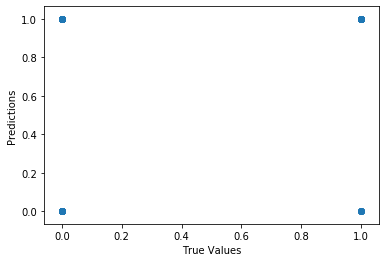

In [0]:
plt.scatter(y_strat_test_set, predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [0]:
y_strat_test_set.iloc[1000]

1

In [0]:
predict[1000]

1

In [0]:
model.score(X_test_data_prepared, y_strat_test_set)

-0.03202846975088968